<img src="real_estate.png">

# King County House Sales

**Author:** Hazal Aydin
***

## Overview

The scope of this study is to assist a real estate agency that helps individuals in selling homes. The expected outcome is to guide homeowners on how renovations could potentially enhance the assessed value of their properties and by what degree - by identifing the key property features, such as square footage and number of rooms. The model I prepared is created through 5 iterations. 86.6% of the variations in the sale prices can be explained by the model, but it has its own limitations and could be refined even futher. With this initial study, we identified "square footage of house apart from basement", "the square footage of interior housing living space for the nearest 15 neighbors" and "the square footage of the lot" as the most important features.

## Setting Up The Study

In [2]:
# Importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import FunctionTransformer

sns.set_theme(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format

## Data Understanding


The King County House Sales dataset is used for this study. It comes from 2014-2015 year's sales data and consists of 21 features, including an unique id, and 21,597 entries. With the amount of entries, the modelling process should satisfy the minimum requirements of the tests (i.e. Jarque-Bera) and the outcomes are likely to be accurate.

In [2]:
# Displaying the Column Names Markdown File

from IPython.display import Markdown, display
display(Markdown("data/column_names.md"))

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [3]:
# Importing the Kings County House Data
df_data = pd.read_csv('data/kc_house_data.csv')
df_data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.00         3       1.00         1180   
1  6414100192   12/9/2014 538000.00         3       2.25         2570   
2  5631500400   2/25/2015 180000.00         2       1.00          770   
3  2487200875   12/9/2014 604000.00         4       3.00         1960   
4  1954400510   2/18/2015 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00         NaN  0.00  ...      7        1180            0.0   
1      7242    2.00        0.00  0.00  ...      7        2170          400.0   
2     10000    1.00        0.00  0.00  ...      6         770            0.0   
3      5000    1.00        0.00  0.00  ...      7        1050          910.0   
4      8080    1.00        0.00  0.00  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0     1955          0.00    98178 47.51 -122.26           1340        5650  
1     1951       1991.00    98125 47.72 -122.32           1690        7639  
2     1933           NaN    98028 47.74 -122.23           2720        8062  
3     1965          0.00    98136 47.52 -122.39           1360        5000  
4     1987          0.00    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

In [4]:
df_data.describe()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21597.00   21597.00  21597.00   21597.00     21597.00   21597.00   
mean  4580474287.77  540296.57      3.37       2.12      2080.32   15099.41   
std   2876735715.75  367368.14      0.93       0.77       918.11   41412.64   
min      1000102.00   78000.00      1.00       0.50       370.00     520.00   
25%   2123049175.00  322000.00      3.00       1.75      1430.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900490.00  645000.00      4.00       2.50      2550.00   10685.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count 21597.00    19221.00 21534.00   21597.00 21597.00    21597.00  21597.00   
mean      1.49        0.01     0.23       3.41     7.66     1788.60   1971.00   
std       0.54        0.09     0.77       0.65     1.17      827.76     29.38   
min       1.00        0.00     0.00       1.00     3.00      370.00   1900.00   
25%       1.00        0.00     0.00       3.00     7.00     1190.00   1951.00   
50%       1.50        0.00     0.00       3.00     7.00     1560.00   1975.00   
75%       2.00        0.00     0.00       4.00     8.00     2210.00   1997.00   
max       3.50        1.00     4.00       5.00    13.00     9410.00   2015.00   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count      17755.00 21597.00 21597.00 21597.00       21597.00    21597.00  
mean          83.64 98077.95    47.56  -122.21        1986.62    12758.28  
std          399.95    53.51     0.14     0.14         685.23    27274.44  
min            0.00 98001.00    47.16  -122.52         399.00      651.00  
25%            0.00 98033.00    47.47  -122.33        1490.00     5100.00  
50%            0.00 98065.00    47.57  -122.23        1840.00     7620.00  
75%            0.00 98118.00    47.68  -122.12        2360.00    10083.00  
max         2015.00 98199.00    47.78  -121.31        6210.00   871200.00

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Understanding & Preparation

At a first glance, I can see that I won't be using "view" feature because they are not in the context of this study. Although the "lat", and "long" features can affect the house prices, they are also not in the scope - because homeowners cannot change their coordinates with renovations. The same argument can be made for the "zipcode" but I'll leave them in the study for the model - while removing "view", "lat", and "long".

I can see that the majority of the attributes are numerical and has no null values. "Waterfront"and "yr_renovated" have null values need addressing. 

"Sqft_basement" attribute also stands out with its data type, which is object but it should be float.

Finally, I want to explore "Date", "yr_built" and "yr_renovated" attributes more in depth to see if I can transform them into more relevant attributes for this study.

In [6]:
# First, I will drop "id", "view", "lat" and "long" columns.
df_data = df_data.drop(['id','lat','long', 'view'], axis=1) 
df_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [7]:
# Let's explore the "waterfront" feature.
df_data['waterfront'].value_counts(dropna=False)

0.00    19075
NaN      2376
1.00      146
Name: waterfront, dtype: int64

In [8]:
# Waterfront is a categorical attribute where "1" represents the present of the waterview.
# And "0" represents the absent of the view.
# Since we don't know which category the null values belong to, I will create a new "unknown" value for them.
# To have a consistency in the data representation, I'll change '0' to 'No', '1' to 'Yes' as well.

In [9]:
df_data['waterfront'] = df_data['waterfront'].fillna('unknown')
df_data['waterfront'] = df_data['waterfront'].apply(str)
df_data['waterfront'] = df_data['waterfront'].replace({'0.0': 'No', '1.0': 'Yes'})
df_data['waterfront'].value_counts()

No         19075
unknown     2376
Yes          146
Name: waterfront, dtype: int64

In [10]:
# Let's explore "yr_renovated"
df_data['yr_renovated'].value_counts()

0.00       17011
2014.00       73
2013.00       31
2003.00       31
2007.00       30
           ...  
1951.00        1
1953.00        1
1946.00        1
1976.00        1
1948.00        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
df_data['yr_renovated'].isna().sum()

3842

In [12]:
# There are high number of zeros which is similar to nulls. 
# It's highly likely that these nulls values belong to the houses which are not renovated.
# I'll assign '0' to null values.
df_data['yr_renovated'] = df_data['yr_renovated'].fillna(0)

In [13]:
df_data['yr_renovated'].value_counts()

0.00       20853
2014.00       73
2013.00       31
2003.00       31
2007.00       30
           ...  
1951.00        1
1953.00        1
1946.00        1
1976.00        1
1948.00        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# 20,853 houses out of 21,597 (about 96.56% of the total houses) didn't have a renovation.
# I believe the renovation could work as a categorical feature.
# I will categorise the renovations since 2009 as "recently". It'll give the houses renovated in the past 10-11 years.
df_data['renovated'] = np.where(df_data['yr_renovated']== 0, 'not renovated',
                             np.where(df_data['yr_renovated']>=2009, 'recently renovated', 'renovated'))

In [15]:
df_data['renovated'].value_counts()

not renovated         20853
renovated               573
recently renovated      171
Name: renovated, dtype: int64

In [16]:
# Since we added the categorical feature for the renovation, I can drop the yr_renovated from my dataset.
df_data = df_data.drop(['yr_renovated'], axis=1)

In [17]:
# Let's explore "sqft_basement" attribute to see why the data type is not float.
df_data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [18]:
df_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [19]:
# It seems like the "?" value is causing the issue here.
# First, I'll assign "?" to a null value.
df_data.loc[df_data['sqft_basement'] == '?', 'sqft_basement'] = np.nan

# Checking if there's any null values are remaining
df_data['sqft_basement'].isna().sum()

454

In [20]:
# Looking at the data, the sum of "sqft_above" and "sqft_basement" equals to "sqft_living".
# That's why, I'm replacing null values with the "sqft_living" minus "sqft_above"
df_data['sqft_basement'] = df_data['sqft_basement'].fillna(df_data['sqft_living'] - df_data['sqft_above'])

# Checking if there's any null values are remaining
df_data['sqft_basement'].isna().sum()

0

In [21]:
# We have sale year and built years of the houses already.
# I want to add the age of the houses as a new feature because I will it'll make data easier to analyse.
# Let's substract the sale year from the "date" feature.

#First I'm importing datetime module
import datetime

# Then, I'm adding a new column for year of sale
df_data['yr_sale'] = pd.DatetimeIndex(df_data['date']).year

# Finally, based on the year of sale, I'm calculating the age of the house when it's sold
df_data['yr_old'] = df_data['yr_sale'] - df_data['yr_built']

# Let's check the final dataframe to see the changes are implemented
df_data.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014 221900.00         3       1.00         1180      5650    1.00   
1   12/9/2014 538000.00         3       2.25         2570      7242    2.00   
2   2/25/2015 180000.00         2       1.00          770     10000    1.00   
3   12/9/2014 604000.00         4       3.00         1960      5000    1.00   
4   2/18/2015 510000.00         3       2.00         1680      8080    1.00   

  waterfront  condition  grade  sqft_above sqft_basement  yr_built  zipcode  \
0    unknown          3      7        1180           0.0      1955    98178   
1         No          3      7        2170         400.0      1951    98125   
2         No          3      6         770           0.0      1933    98028   
3         No          5      7        1050         910.0      1965    98136   
4         No          3      8        1680           0.0      1987    98074   

   sqft_living15  sqft_lot15      renovated  yr_sale  yr_old  
0           1340        5650  not renovated     2014      59  
1           1690        7639      renovated     2014      63  
2           2720        8062  not renovated     2015      82  
3           1360        5000  not renovated     2014      49  
4           1800        7503  not renovated     2015      28

In [22]:
# Since I used "yr_sale" for the calculation of the "yr_old", I can drop the feature now.
df_data = df_data.drop(['yr_sale'], axis=1)

# I have no use for the date as well.
df_data = df_data.drop(['date'], axis=1)

In [23]:
# Finally, I want to check the unique values of the other features to see if there are any issues need addressing.
df_data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [24]:
df_data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [25]:
df_data['condition'].unique()

array([3, 5, 4, 1, 2])

In [26]:
df_data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [27]:
df_data['yr_old'].unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1])

In [28]:
df_data = df_data[df_data.yr_old > 0]

In [29]:
# Checking the final dataframe
df_data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0 221900.00         3       1.00         1180      5650    1.00    unknown   
1 538000.00         3       2.25         2570      7242    2.00         No   
2 180000.00         2       1.00          770     10000    1.00         No   
3 604000.00         4       3.00         1960      5000    1.00         No   
4 510000.00         3       2.00         1680      8080    1.00         No   

   condition  grade  sqft_above sqft_basement  yr_built  zipcode  \
0          3      7        1180           0.0      1955    98178   
1          3      7        2170         400.0      1951    98125   
2          3      6         770           0.0      1933    98028   
3          5      7        1050         910.0      1965    98136   
4          3      8        1680           0.0      1987    98074   

   sqft_living15  sqft_lot15      renovated  yr_old  
0           1340        5650  not renovated      59  
1           1690        7639      renovated      63  
2           2720        8062  not renovated      82  
3           1360        5000  not renovated      49  
4           1800        7503  not renovated      28

In [30]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21155 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21155 non-null  float64
 1   bedrooms       21155 non-null  int64  
 2   bathrooms      21155 non-null  float64
 3   sqft_living    21155 non-null  int64  
 4   sqft_lot       21155 non-null  int64  
 5   floors         21155 non-null  float64
 6   waterfront     21155 non-null  object 
 7   condition      21155 non-null  int64  
 8   grade          21155 non-null  int64  
 9   sqft_above     21155 non-null  int64  
 10  sqft_basement  21155 non-null  object 
 11  yr_built       21155 non-null  int64  
 12  zipcode        21155 non-null  int64  
 13  sqft_living15  21155 non-null  int64  
 14  sqft_lot15     21155 non-null  int64  
 15  renovated      21155 non-null  object 
 16  yr_old         21155 non-null  int64  
dtypes: float64(3), int64(11), object(3)
memory usage: 

In [31]:
# I have realised that the "sqft_basement" data type is object.
# Sqft_basement needs to be a numerical value
# Changing the data type
df_data['sqft_basement'] = df_data['sqft_basement'].astype('float')

# Checking the change
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21155 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21155 non-null  float64
 1   bedrooms       21155 non-null  int64  
 2   bathrooms      21155 non-null  float64
 3   sqft_living    21155 non-null  int64  
 4   sqft_lot       21155 non-null  int64  
 5   floors         21155 non-null  float64
 6   waterfront     21155 non-null  object 
 7   condition      21155 non-null  int64  
 8   grade          21155 non-null  int64  
 9   sqft_above     21155 non-null  int64  
 10  sqft_basement  21155 non-null  float64
 11  yr_built       21155 non-null  int64  
 12  zipcode        21155 non-null  int64  
 13  sqft_living15  21155 non-null  int64  
 14  sqft_lot15     21155 non-null  int64  
 15  renovated      21155 non-null  object 
 16  yr_old         21155 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 

### Multicollinearity of Features

Before diving into the modelling, I will check the multicollinearity between my numerical values to decide which ones shouldn't be used.

In [32]:
numerical = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
             'condition','grade','sqft_above', 'sqft_basement', 'yr_built',
             'sqft_living15', 'sqft_lot15', 'yr_old']

# New dataframe of numberical features only
df_num = df_data[numerical]

#Displaying the new dataframe
df_num.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0         3       1.00         1180      5650    1.00          3      7   
1         3       2.25         2570      7242    2.00          3      7   
2         2       1.00          770     10000    1.00          3      6   
3         4       3.00         1960      5000    1.00          5      7   
4         3       2.00         1680      8080    1.00          3      8   

   sqft_above  sqft_basement  yr_built  sqft_living15  sqft_lot15  yr_old  
0        1180           0.00      1955           1340        5650      59  
1        2170         400.00      1951           1690        7639      63  
2         770           0.00      1933           2720        8062      82  
3        1050         910.00      1965           1360        5000      49  
4        1680           0.00      1987           1800        7503      28

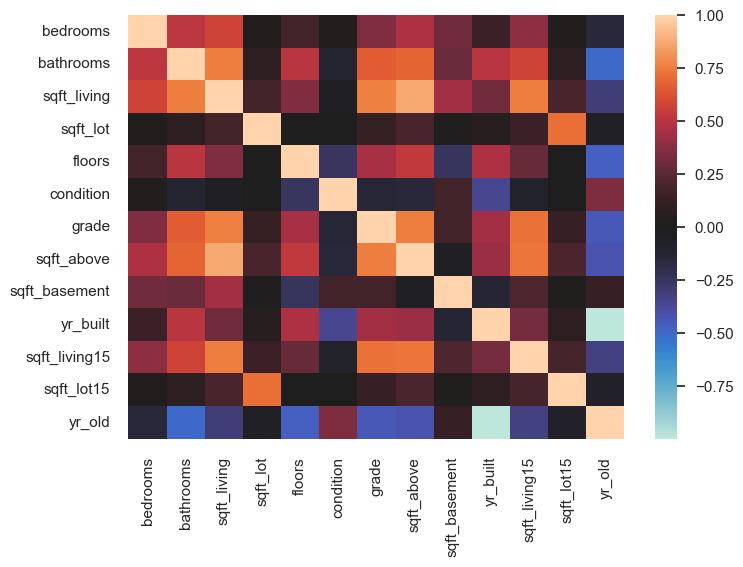

In [33]:
# Creating a heatmap of the independent variables
sns.heatmap(df_num.corr(), center=0);

In [34]:
# Creating a table that will show the highly correlated features 
# Correlation greater than 0.75)                           
df = df_num.corr().abs().stack().reset_index()
df.columns = ['feature1', 'feature2', 'corr']
df[(df['corr']>.75) & (df['corr'] <1)]

feature1       feature2  corr
15       bathrooms    sqft_living  0.75
27     sqft_living      bathrooms  0.75
32     sqft_living          grade  0.76
33     sqft_living     sqft_above  0.87
36     sqft_living  sqft_living15  0.76
80           grade    sqft_living  0.76
85           grade     sqft_above  0.76
93      sqft_above    sqft_living  0.87
97      sqft_above          grade  0.76
129       yr_built         yr_old  1.00
132  sqft_living15    sqft_living  0.76
165         yr_old       yr_built  1.00

The features "yr_old" and "yr_built" shows perfect co-linearity which makes sense because I calculated the Yr_old based on the Yr_built - so they interact in an "additive" manner. I'll remove the "yr_built" feature will not be used.

The features "sqft_living" and "grade" highly correlate with the multiple features. It also makes sense because "sqft_living" interacts with "sqft_above" and "sqft_basement" as an additive manner as well. The feature "grade" is also similar with "condition".

In a summary, I will exclude "yr_built", "sqft_living" and "grade" from the study.

In [35]:
# I will create a new dataframe without the features I'm excluding.
# I'm not simply dropping the features because I may need to use them in the future.
data_final = df_data.drop(['yr_built', 'sqft_living', 'grade'], axis=1)

# Displaying the new dataframe
data_final.head()

price  bedrooms  bathrooms  sqft_lot  floors waterfront  condition  \
0 221900.00         3       1.00      5650    1.00    unknown          3   
1 538000.00         3       2.25      7242    2.00         No          3   
2 180000.00         2       1.00     10000    1.00         No          3   
3 604000.00         4       3.00      5000    1.00         No          5   
4 510000.00         3       2.00      8080    1.00         No          3   

   sqft_above  sqft_basement  zipcode  sqft_living15  sqft_lot15  \
0        1180           0.00    98178           1340        5650   
1        2170         400.00    98125           1690        7639   
2         770           0.00    98028           2720        8062   
3        1050         910.00    98136           1360        5000   
4        1680           0.00    98074           1800        7503   

       renovated  yr_old  
0  not renovated      59  
1      renovated      63  
2  not renovated      82  
3  not renovated      49  
4  not renovated      28

### Checking for Linearity of Parameters

Although it's not required to have a linear relationship between the dependent variable (price) and the independent variables (features), checking linearity of the features help identifying the categorical variables and gives an idea of the future transformations.


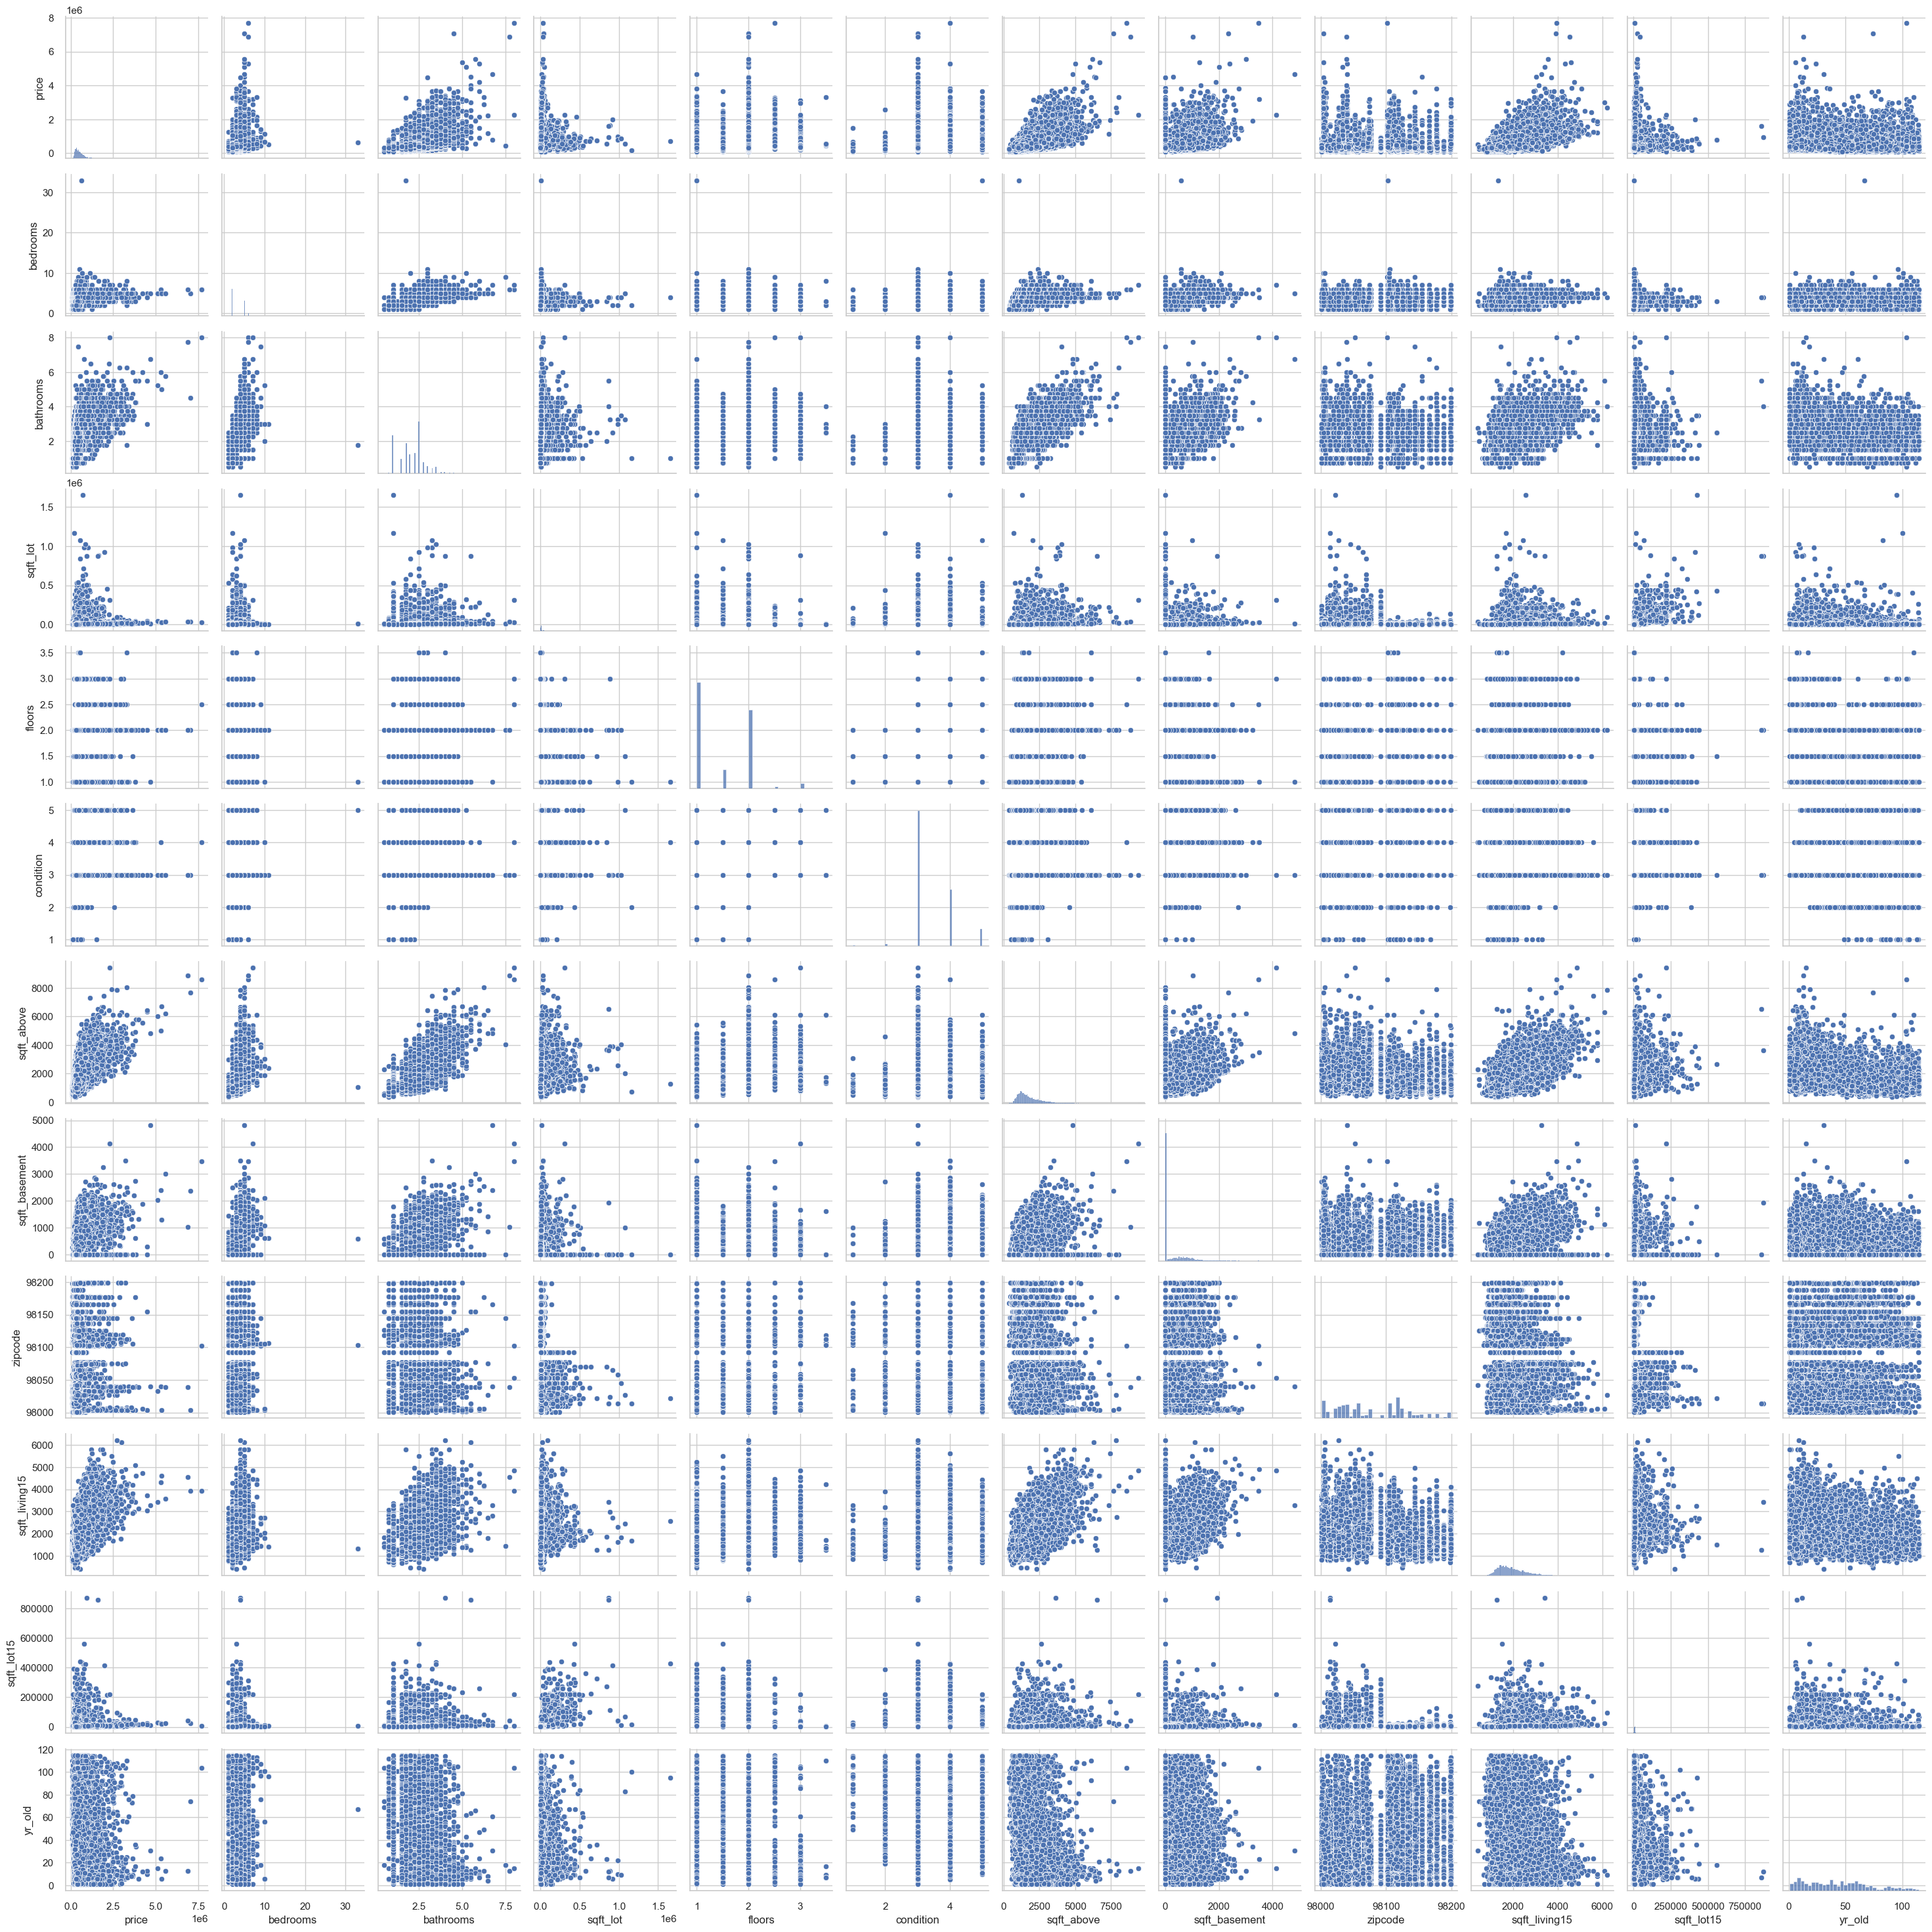

In [36]:
sns.pairplot(data_final);

I can clearly see the difference in the magnitudes and the number of the features are making the plot diffucult to read. Before commenting on the plots, I want to see the linearity between the price and the other features more closely.

From a first glance, I can see that none of the columns don't have a strong linear relationship with price. Because I'm running a MLR model, I will transform the features iteratively.

Features "zipcode", "waterfront" and "renovated" are definetely categorical values need to be one hot encoded. Features "floors" and "condition" could be treated as categorical values but I'll explore it later.

Lastly, I can clearly see the outliers in the plot. They may need addressing in the future iterations as well.

In [37]:
import seaborn as sns

def plot(df, target='price'):
    fig, ax = plt.subplots(nrows = len(df.columns), figsize=(10,50))
    
    for i, col in enumerate(df.columns):
#         sns.lmplot(x=col, y=target, data=df)
        ax[i].scatter(df[col], df[target])
        ax[i].set_xlabel(col)
        ax[i].set_ylabel(target)
        ax[i].set_title(f"{col} vs. {target}")

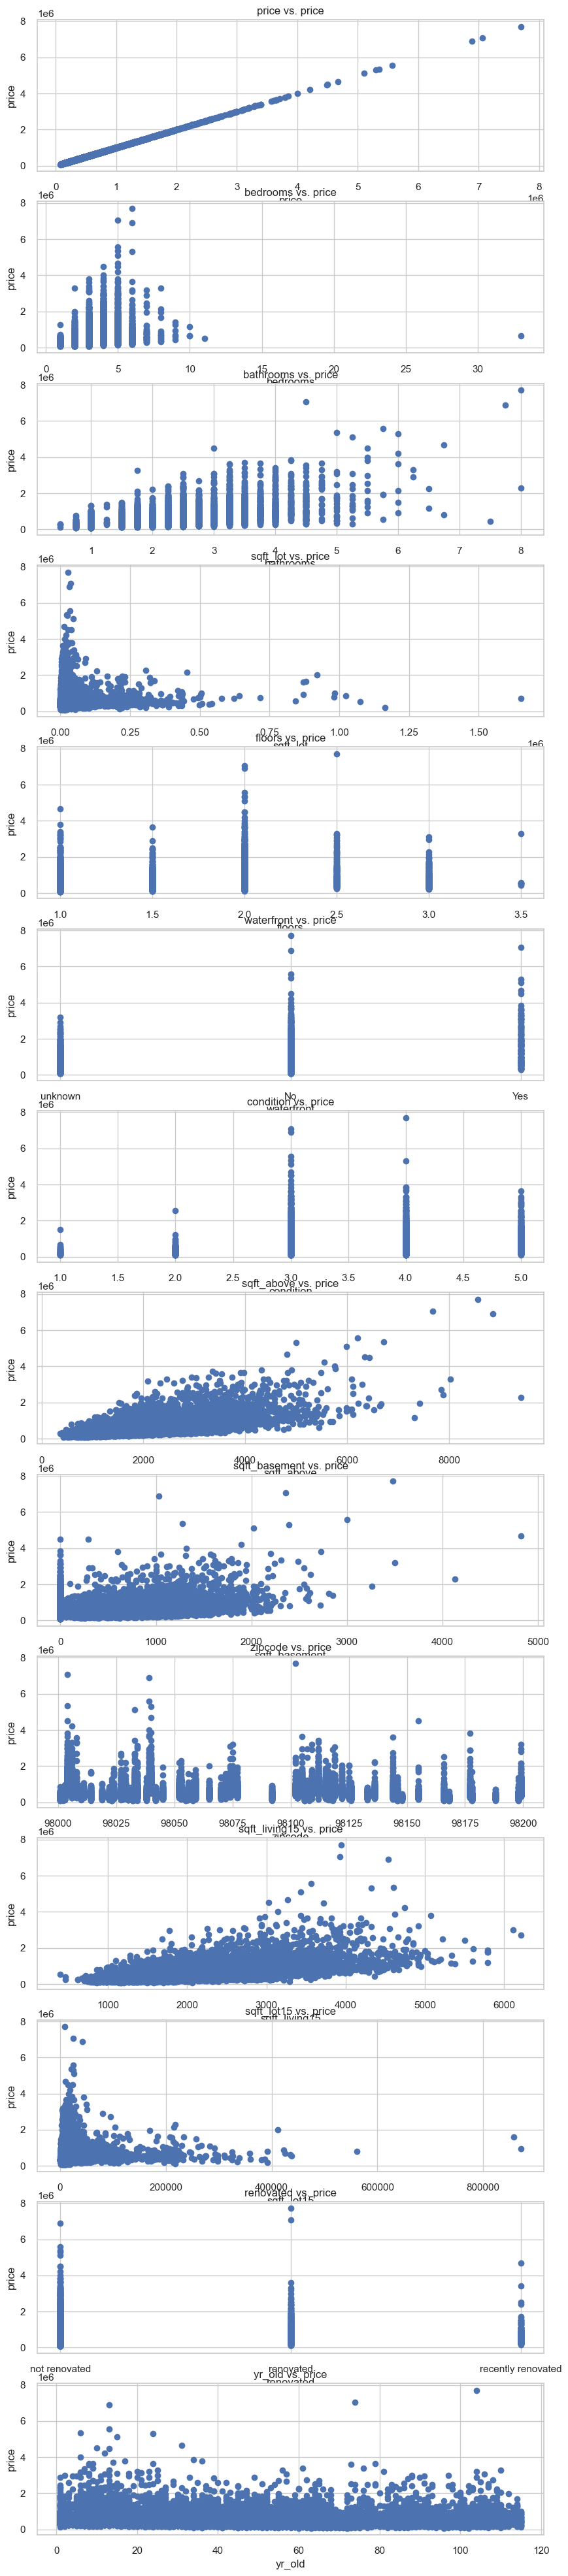

In [38]:
plot(df=data_final, target='price')

### One Hot Encoding

Creating dummy variables, aka one hot encoding, is neccessary to transform categorical data into numerical values. In this way, the features that are transformed can be used in MLR model.

In [39]:
# Creating dummies for "zipcode", "waterfront", and "renovated" features.
# Dropping one of the dummy variables for each categorical feature to avoid "dummy variable trap"

zip_dummies = pd.get_dummies(data_final['zipcode'], prefix='zip', drop_first=True)
reno_dummies = pd.get_dummies(data_final['renovated'], prefix='reno', drop_first=True)

# I want to drop the "unknown" value in the "waterfront" feature. That's why, I'll drop the value later.
water_dummies = pd.get_dummies(data_final['waterfront'], prefix='water', drop_first=False)

# Removing the original columns from the data while creating a new dataframe
df_ohe = data_final.drop(['zipcode', 'waterfront', 'renovated'], axis = 1)

# Adding the dummy columns
df_ohe = pd.concat([df_ohe, zip_dummies, water_dummies, reno_dummies], axis=1)

# Dropping "wtr_Unknown" to avoid "dummt variable trap"
df_ohe = df_ohe.drop(['water_unknown'], axis=1)

# Checking the new dataframe
df_ohe.head()

price  bedrooms  bathrooms  sqft_lot  floors  condition  sqft_above  \
0 221900.00         3       1.00      5650    1.00          3        1180   
1 538000.00         3       2.25      7242    2.00          3        2170   
2 180000.00         2       1.00     10000    1.00          3         770   
3 604000.00         4       3.00      5000    1.00          5        1050   
4 510000.00         3       2.00      8080    1.00          3        1680   

   sqft_basement  sqft_living15  sqft_lot15  ...  zip_98168  zip_98177  \
0           0.00           1340        5650  ...          0          0   
1         400.00           1690        7639  ...          0          0   
2           0.00           2720        8062  ...          0          0   
3         910.00           1360        5000  ...          0          0   
4           0.00           1800        7503  ...          0          0   

   zip_98178  zip_98188  zip_98198  zip_98199  water_No  water_Yes  \
0          1          0          0          0         0          0   
1          0          0          0          0         1          0   
2          0          0          0          0         1          0   
3          0          0          0          0         1          0   
4          0          0          0          0         1          0   

   reno_recently renovated  reno_renovated  
0                        0               0  
1                        0               1  
2                        0               0  
3                        0               0  
4                        0               0  

[5 rows x 84 columns]

In [40]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21155 entries, 0 to 21596
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21155 non-null  float64
 1   bedrooms                 21155 non-null  int64  
 2   bathrooms                21155 non-null  float64
 3   sqft_lot                 21155 non-null  int64  
 4   floors                   21155 non-null  float64
 5   condition                21155 non-null  int64  
 6   sqft_above               21155 non-null  int64  
 7   sqft_basement            21155 non-null  float64
 8   sqft_living15            21155 non-null  int64  
 9   sqft_lot15               21155 non-null  int64  
 10  yr_old                   21155 non-null  int64  
 11  zip_98002                21155 non-null  uint8  
 12  zip_98003                21155 non-null  uint8  
 13  zip_98004                21155 non-null  uint8  
 14  zip_98005             

## Model Creation

This is the step where we fit the data with a multilinear regression model. It is an iterative approach that will tune models to get the highest performance possible.

While creating the model iterations, we'll check the primary assumptions for the multilinear regression - linearity, normality and homoscedasticity. We'll also use a "train and test split" to validate each model iteration.

### Iteration 0: Baseline Model

Even though I will not fit the baseline model, I'll state that this naive model is the first iteration (itearion 0). It doesn't use any of the indepenedent variables to predict the depedent variable (Y). Instead, it uses the mean of the observed the values of Y. 

R2 values are calculated using the baseline model and (squared errors for the fitted model and the baseline model). That's way the R2 would be always 0.

### Iteration 1: Model 1

I will create the first model without running any transformations.
So far, I removed the predictors that have high multicolinaerity and created dummy variables for the categorical predictors.

In [41]:
# First, I'm splitting the data into train and test groups

# X is my independent variables aka features
X = df_ohe.drop("price", axis=1)

# Y is my dependent variable which is "price" in this model
y = df_ohe["price"]

# Splitting the data
# Using a random state for reproducible output
# I picked "25" as a random state
# We have 21,597 entries in this dataframe and I need to decide what the split ratio will be.
# With less testing data, the performance of the model will have greater variance.
# With less training data, my parameters estimates will have greater variance.
# Because the size of my sample (n=21,597) is not too large, I'll follow the industry best practice.
# I'm using 80/20 split here (instead of 75/25 default split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [42]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
# Fitting a linear regression model and calculate MSE for test and train
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_train, y_hat_train)
test_r2 = r2_score(y_test, y_hat_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.7886543240632615 & Mean Absolute Error 27784387738.605362
Testing Scores: R2 0.7743000687276936 & Mean Absolute Error 32969991533.65381


#### Comments:

- The first model explains 78.86% of the variance in the dependent variable (Y) by the independent variables (X) whereas the test group explains 77.43% of the variance. The difference in R2s only -1.78% (Test vs Train).
- Mean Absolute Erros (MSEs) are also producing close outputs. The testing set's MSE is only 0.13% lower than the training set's.
- The difference between test score and training score is small. The model seems to be a good fit.

#### Evaluation of The Model 1

In [44]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_train X_test y_train y_test 

X_train_with_intercept = sm.add_constant(X_train)
model_1 = sm.OLS(y_train,X_train_with_intercept).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     757.1
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:35:33   Log-Likelihood:            -2.2751e+05
No. Observations:               16924   AIC:                         4.552e+05
Df Residuals:                   16840   BIC:                         4.558e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.695e+05    1.5e+04    -17.988      0.000   -2.99e+05    -2.4e+05
bedrooms                -3.463e+04   1770.436    -19.560      0.000   -3.81e+04   -3.12e+04
bathrooms                2.807e+04   3112.645      9.018      0.000     2.2e+04    3.42e+04
sqft_lot                    0.2964      0.042      7.009      0.000       0.213       0.379
floors                  -3.604e+04   3736.626     -9.646      0.000   -4.34e+04   -2.87e+04
condition                2.733e+04   2238.043     12.211      0.000    2.29e+04    3.17e+04
sqft_above                240.1140      3.249     73.904      0.000     233.746     246.482
sqft_basement             163.4551      4.080     40.058      0.000     155.457     171.453
sqft_living15              63.1159      3.236     19.504      0.000      56.773      69.459
sqft_lot15                 -0.1154      0.071     -1.631      0.103      -0.254       0.023
yr_old                    285.6002     73.045      3.910      0.000     142.424     428.776
zip_98002                2.341e+04   1.67e+04      1.398      0.162   -9407.870    5.62e+04
zip_98003                3010.5233   1.49e+04      0.202      0.840   -2.62e+04    3.22e+04
zip_98004                7.971e+05   1.44e+04     55.210      0.000    7.69e+05    8.25e+05
zip_98005                3.141e+05   1.78e+04     17.614      0.000    2.79e+05    3.49e+05
zip_98006                 3.01e+05   1.32e+04     22.873      0.000    2.75e+05    3.27e+05
zip_98007                2.619e+05   1.87e+04     13.976      0.000    2.25e+05    2.99e+05
zip_98008                  2.7e+05   1.49e+04     18.119      0.000    2.41e+05    2.99e+05
zip_98010                5.095e+04   2.17e+04      2.352      0.019    8495.318    9.34e+04
zip_98011                 1.24e+05   1.66e+04      7.452      0.000    9.14e+04    1.57e+05
zip_98014                9.943e+04   2.01e+04      4.949      0.000       6e+04    1.39e+05
zip_98019                6.844e+04   1.69e+04      4.053      0.000    3.53e+04    1.02e+05
zip_98022                  1.1e+04   1.61e+04      0.684      0.494   -2.05e+04    4.25e+04
zip_98023               -1.809e+04   1.29e+04     -1.398      0.162   -4.35e+04    7278.648
zip_98024                1.584e+05    2.4e+04      6.589      0.000    1.11e+05    2.05e+05
zip_98027                1.672e+05   1.35e+04     12.362      0.000    1.41e+05    1.94e+05
zip_98028                1.252e+05    1.5e+04      8.321      0.000    9.57e+04    1.55e+05
zip_98029                2.258e+05   1.44e+04     15.678      0.000    1.98e+05    2.54e+05
zip_98030                3479.2932   1.53e+04      0.228      0.820   -2.65e+04    3.34e+04
zip_98031                8147.7581   1.51e+04      0.538      0.591   -2.15e+04    3.78e+04
zip_98032                1.979e+04   1.97e+04  

#### Comments:

- Our Adj. R-squared is 78.8% which means 78.8% of the variations in dependent variable y are explained by the independent variable in our model. It's quite high already. Let's see how much we can improve the score through iterations.

- P-value for the F-statistic is display as 0.00 - The value is probably too small to be displayed and definetely below 0.05. We can reject the null hypothesis and conclude that at least one of the independent variables has a statistically significant effect on the dependent variable.

- Majority of the variables seem statistically significant as well. I won't remove any indepdent variables just yet.

- The very high Jarque-Bera result shows that the errors are not normally distributed.

- Finally, the condition number is large, 3.36e+06. It means that the model's predictions are highly sensitive to small changes in the input features, and the model may not be very stable or reliable.

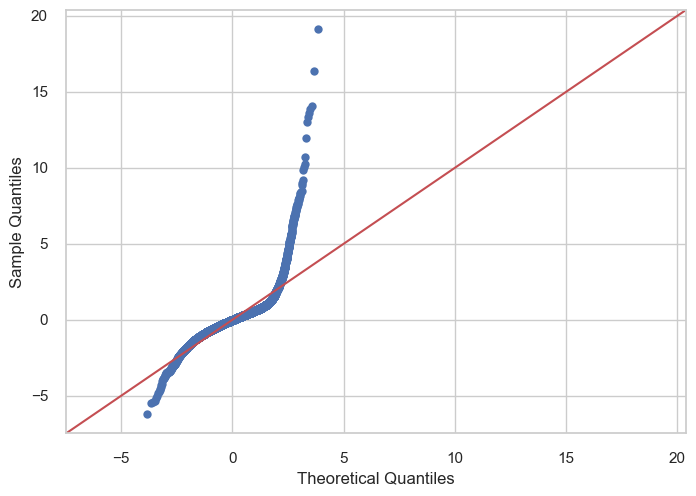

In [45]:
# Let's look into the normality assumptions with visuals.
# Drawing a Q-Q Plot the check how the errors are distributed.
resid1 = model_1.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

As expected, the residuals are not normally distributed. The graph indicates a wide spread and right skewness.

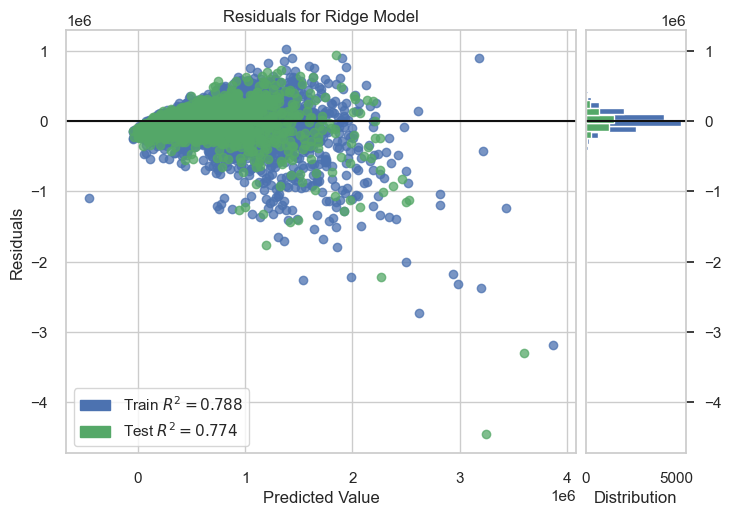

In [46]:
# Let's check the homoscedasticity
# Instantiate the linear model and visualizer
model_1 = Ridge()
visualizer = ResidualsPlot(model_1)
# Fit the training data
visualizer.fit(X_train, y_train) 
# Score the test data
visualizer.score(X_test, y_test)
# Plot the residuals
visualizer.show();

We can clearly see that the residuals are heteroscedastic.

### Iteration 2: Model 2

With model 2, I'll address the non-linear relationship between the dependent variable and continuous independendent variables. To make it easier to model, I will run log transformations.

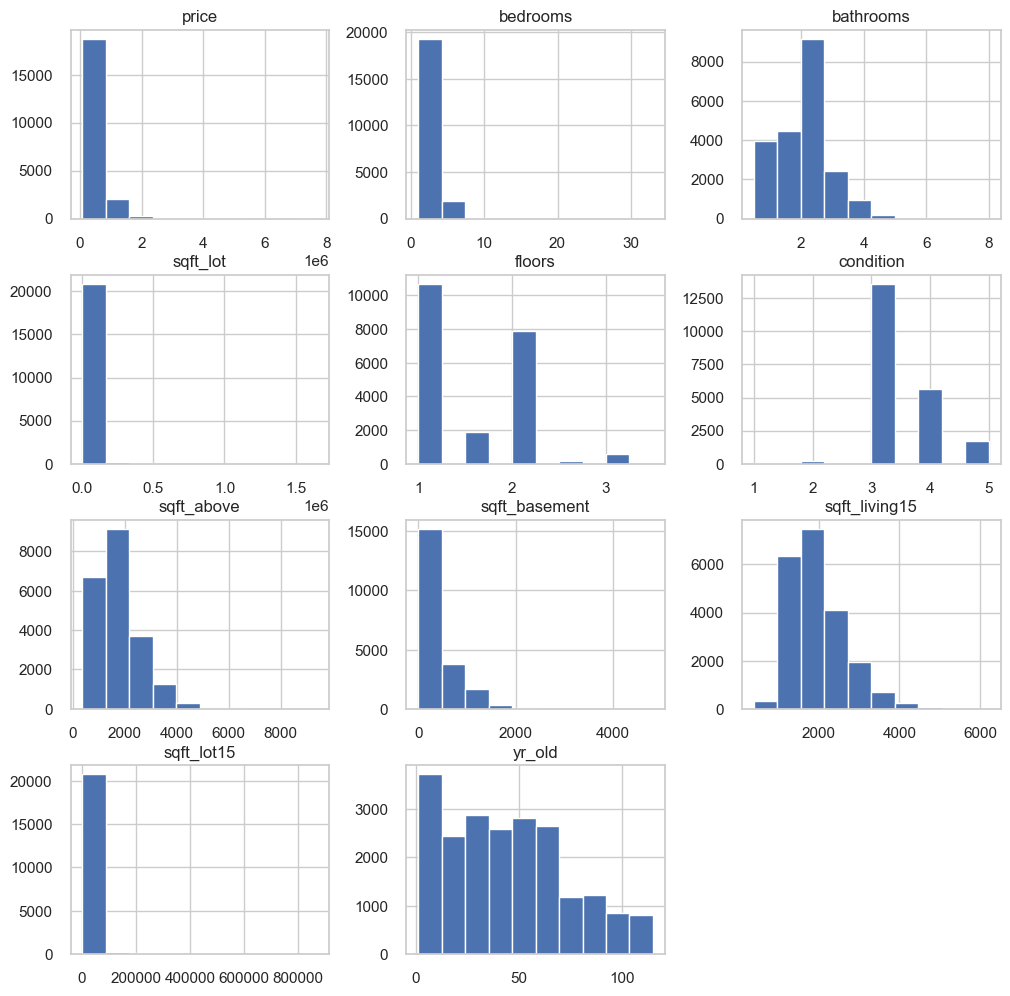

In [47]:
# Seperating the continuous variables

continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition',
              'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_old']

df_cont = df_ohe[continuous]

# Let's check the skewness with histograms
df_cont.hist(figsize= (12, 12))
plt.show()

None of the variables are normally distributed.

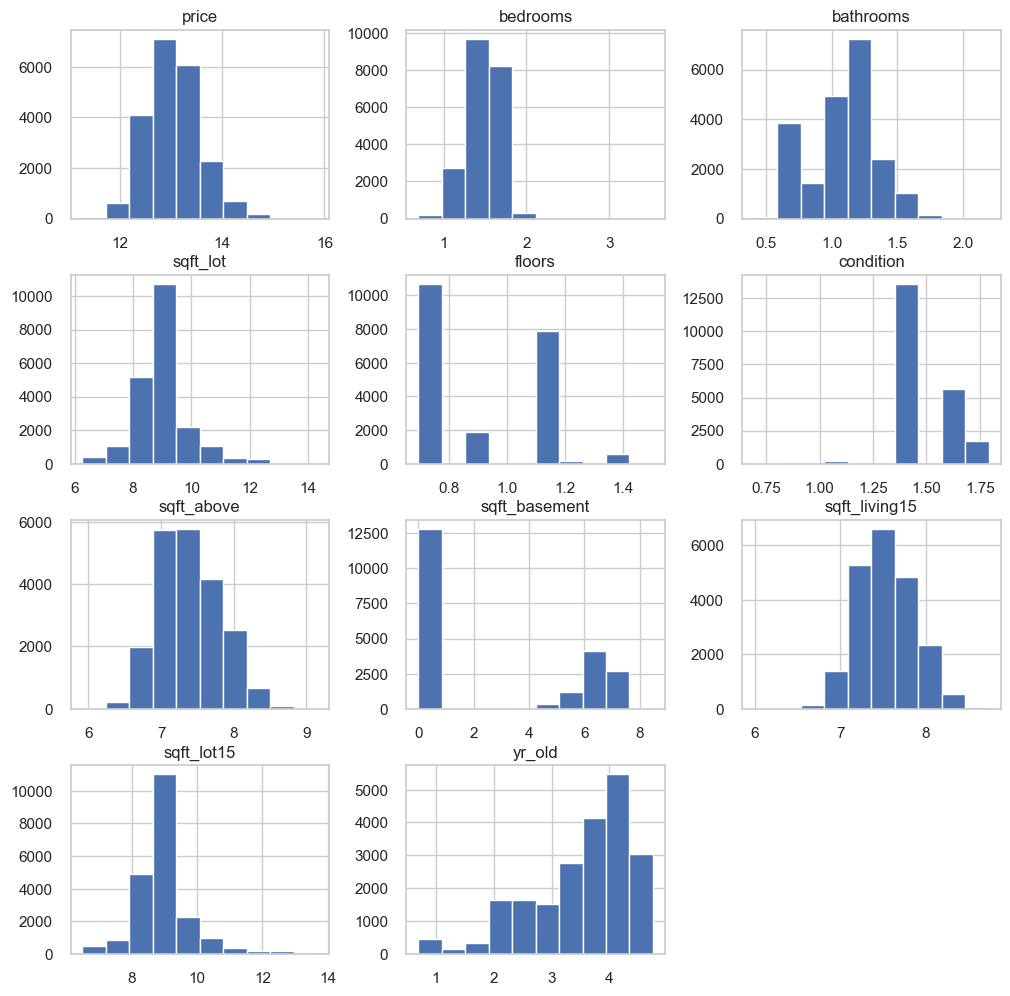

In [48]:
# Taking logs of continuous dataset
df_cont_log = np.log1p(df_cont)

# Replace infinite updated data with nan
df_cont_log.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_cont_log.dropna(inplace=True)

# Plotting histograms
df_cont_log.hist(figsize= (12, 12))
plt.show()

The features are looking more normally distributed.

In [49]:
# Instantiate a custom transformer for log transformation 
log_transformer = FunctionTransformer(np.log, validate=True)

# Columns to be log transformed 
log_columns = ['price','bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
               'sqft_living15','sqft_lot15', 'yr_old']

# New names for columns after transformation
new_log_columns = ['log_price','log_bedrooms', 'log_bathrooms', 'log_sqft_lot', 'log_floors', 'log_condition', 
                   'log_sqft_above', 'log_sqft_basement', 'log_sqft_living15','log_sqft_lot15', 'log_yr_old']

# Log transform the main dataframe and convert them into a DataFrame 
df_ohe[log_columns] = np.log(df_ohe[log_columns] + 1)

In [50]:
# X is my independent variables aka features
X_2 = df_ohe.drop("price", axis=1)

# Y is my dependent variable which is "price" in this model
Y_2 = df_ohe["price"]

# Splitting the data
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, Y_2, test_size = 0.2, random_state=12)

In [51]:
regressor = LinearRegression()
regressor.fit(X_2_train, y_2_train)

LinearRegression()

In [52]:
#Fitting a linear regression model and calculate MSE for test and train
linreg = LinearRegression()
linreg.fit(X_2_train, y_2_train)

y_2_hat_train = linreg.predict(X_2_train)
y_2_hat_test = linreg.predict(X_2_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_2_train, y_2_hat_train)
test_r2 = r2_score(y_2_test, y_2_hat_test)

train_mse = mean_squared_error(y_2_train, y_2_hat_train)
test_mse = mean_squared_error(y_2_test, y_2_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.8645649375120071 & Mean Absolute Error 0.037429011031344495
Testing Scores: R2 0.8542225241233197 & Mean Absolute Error 0.04065428934364254


#### Comments:

- The training R2 is 1.21% higher than the testing R2. 
- The training Mean Absolute Error is also -7.93% lower than the testing Mean Absolute Error.
- The outputs are very close to each others in terms of value. Although there's a small overfitting indication, it's not a level that we need to worry about.
- Overall, it seems to be a good fit.

#### Evaluation of The Model 2

In [53]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_2_train X_2_test y_2_train y_2_test 

X_2_train_with_intercept = sm.add_constant(X_2_train)
model_2 = sm.OLS(y_2_train,X_2_train_with_intercept).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1295.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:35:36   Log-Likelihood:                 3786.2
No. Observations:               16924   AIC:                            -7404.
Df Residuals:                   16840   BIC:                            -6754.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.4181      0.053    102.543      0.000       5.315       5.522
bedrooms                   -0.1046      0.010    -10.957      0.000      -0.123      -0.086
bathrooms                   0.1274      0.011     11.755      0.000       0.106       0.149
sqft_lot                    0.0888      0.004     20.066      0.000       0.080       0.098
floors                     -0.0792      0.012     -6.672      0.000      -0.103      -0.056
condition                   0.2946      0.012     24.673      0.000       0.271       0.318
sqft_above                  0.5495      0.008     68.642      0.000       0.534       0.565
sqft_basement               0.0242      0.001     36.645      0.000       0.023       0.026
sqft_living15               0.2749      0.008     35.406      0.000       0.260       0.290
sqft_lot15                 -0.0150      0.005     -3.075      0.002      -0.025      -0.005
yr_old                     -0.0360      0.003    -12.841      0.000      -0.041      -0.030
zip_98002                   0.0190      0.020      0.967      0.334      -0.019       0.057
zip_98003                   0.0605      0.018      3.447      0.001       0.026       0.095
zip_98004                   1.1860      0.017     68.912      0.000       1.152       1.220
zip_98005                   0.7772      0.020     38.412      0.000       0.738       0.817
zip_98006                   0.7393      0.015     47.783      0.000       0.709       0.770
zip_98007                   0.6989      0.022     32.397      0.000       0.657       0.741
zip_98008                   0.7145      0.018     40.593      0.000       0.680       0.749
zip_98010                   0.2240      0.025      8.930      0.000       0.175       0.273
zip_98011                   0.4552      0.020     22.933      0.000       0.416       0.494
zip_98014                   0.2919      0.023     12.656      0.000       0.247       0.337
zip_98019                   0.2870      0.020     14.627      0.000       0.249       0.325
zip_98022                   0.0688      0.018      3.722      0.000       0.033       0.105
zip_98023                   0.0092      0.015      0.603      0.547      -0.021       0.039
zip_98024                   0.4235      0.028     15.088      0.000       0.369       0.479
zip_98027                   0.5300      0.016     33.191      0.000       0.499       0.561
zip_98028                   0.4389      0.017     25.380      0.000       0.405       0.473
zip_98029                   0.6646      0.017     38.673      0.000       0.631       0.698
zip_98030                   0.0473      0.018      2.662      0.008       0.012       0.082
zip_98031                   0.0857      0.018      4.824      0.000       0.051       0.121
zip_98032                   0.0314      0.023  

#### Comments:

- Our Adj. R-squared is increased from 78.8% to 86.4%. It's a significant improvement off the back of the log transformations.

- The Jarque-Bera result is still very high but it's dropped -99.61% compared to the previous model.

- We see an improvement in the condirion number as well but it's still at large.


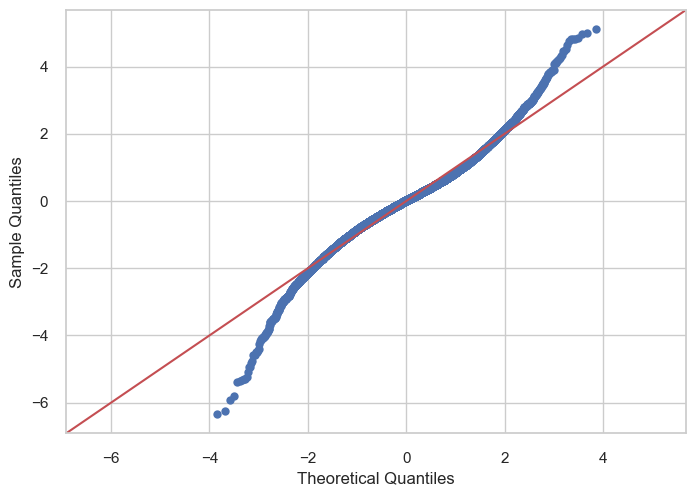

In [54]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid2 = model_2.resid
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

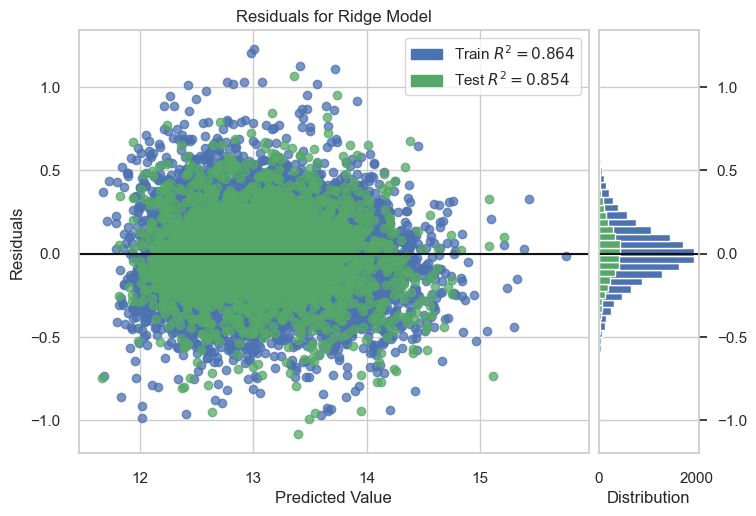

In [55]:
# Instantiate the linear model and visualizer
model_2 = Ridge()
visualizer = ResidualsPlot(model_2)
# Fit the training data
visualizer.fit(X_2_train, y_2_train) 
# Score the test data
visualizer.score(X_2_test, y_2_test)
# Plot the residuals
visualizer.show();

The improvement in the model is very clear. Q-Q plot looks more linear and indicates some skewness - probably coming from the outliers. The residual ridge model shows more of a homoscedastic distribution.

### Iteration 3: Model 3

In this step, I want to normalise my data.

In [56]:
cont = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition',
              'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_old']

#create normalization function
def normalize(series):
    return (series - series.mean()) / series.std()

#perform normalization on X_2_train, X_2_test, y_2_train and y_2_test variables
X_2_train[cont] = X_2_train[cont].apply(normalize)
X_2_test[cont] = X_2_test[cont].apply(normalize)
y_2_train = normalize(y_2_train)
y_2_test = normalize(y_2_test)

In [57]:
regressor = LinearRegression()
regressor.fit(X_2_train, y_2_train)

LinearRegression()

In [58]:
# Fitting a linear regression model and calculate MSE for test and train
linreg = LinearRegression()
linreg.fit(X_2_train, y_2_train)

y_2_hat_train = linreg.predict(X_2_train)
y_2_hat_test = linreg.predict(X_2_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_2_train, y_2_hat_train)
test_r2 = r2_score(y_2_test, y_2_hat_test)

train_mse = mean_squared_error(y_2_train, y_2_hat_train)
test_mse = mean_squared_error(y_2_test, y_2_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.8645649375120071 & Mean Absolute Error 0.13542705994353163
Testing Scores: R2 0.854126721036333 & Mean Absolute Error 0.14583880170558056


#### Comments:

- The normalisation didn't change the results significantly.
- The training R2 is 1.22% higher than the testing R2.
- The training MAE is -7.14% lower than the testing MAE.

#### Evaluation of The Model 3

In [59]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_2_train X_2_test y_2_train y_2_test 

X_3_train_with_intercept = sm.add_constant(X_2_train)
model_3 = sm.OLS(y_2_train,X_3_train_with_intercept).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1295.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:35:37   Log-Likelihood:                -7095.9
No. Observations:               16924   AIC:                         1.436e+04
Df Residuals:                   16840   BIC:                         1.501e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0241      0.024    -42.759      0.000      -1.071      -0.977
bedrooms                   -0.0418      0.004    -10.957      0.000      -0.049      -0.034
bathrooms                   0.0607      0.005     11.755      0.000       0.051       0.071
sqft_lot                    0.1509      0.008     20.066      0.000       0.136       0.166
floors                     -0.0313      0.005     -6.672      0.000      -0.041      -0.022
condition                   0.0792      0.003     24.673      0.000       0.073       0.085
sqft_above                  0.4430      0.006     68.642      0.000       0.430       0.456
sqft_basement               0.1463      0.004     36.645      0.000       0.138       0.154
sqft_living15               0.1704      0.005     35.406      0.000       0.161       0.180
sqft_lot15                 -0.0230      0.007     -3.075      0.002      -0.038      -0.008
yr_old                     -0.0597      0.005    -12.841      0.000      -0.069      -0.051
zip_98002                   0.0361      0.037      0.967      0.334      -0.037       0.109
zip_98003                   0.1152      0.033      3.447      0.001       0.050       0.181
zip_98004                   2.2560      0.033     68.912      0.000       2.192       2.320
zip_98005                   1.4783      0.038     38.412      0.000       1.403       1.554
zip_98006                   1.4063      0.029     47.783      0.000       1.349       1.464
zip_98007                   1.3294      0.041     32.397      0.000       1.249       1.410
zip_98008                   1.3590      0.033     40.593      0.000       1.293       1.425
zip_98010                   0.4261      0.048      8.930      0.000       0.333       0.520
zip_98011                   0.8660      0.038     22.933      0.000       0.792       0.940
zip_98014                   0.5552      0.044     12.656      0.000       0.469       0.641
zip_98019                   0.5459      0.037     14.627      0.000       0.473       0.619
zip_98022                   0.1308      0.035      3.722      0.000       0.062       0.200
zip_98023                   0.0176      0.029      0.603      0.547      -0.040       0.075
zip_98024                   0.8056      0.053     15.088      0.000       0.701       0.910
zip_98027                   1.0082      0.030     33.191      0.000       0.949       1.068
zip_98028                   0.8348      0.033     25.380      0.000       0.770       0.899
zip_98029                   1.2642      0.033     38.673      0.000       1.200       1.328
zip_98030                   0.0900      0.034      2.662      0.008       0.024       0.156
zip_98031                   0.1631      0.034      4.824      0.000       0.097       0.229
zip_98032                   0.0597      0.043  

#### Comments:

- Neither the Adj. R-squared nor the Jarque-Bera result had changed.
- On the other hand, standardization helped with the condition number - which is not at large anymore.

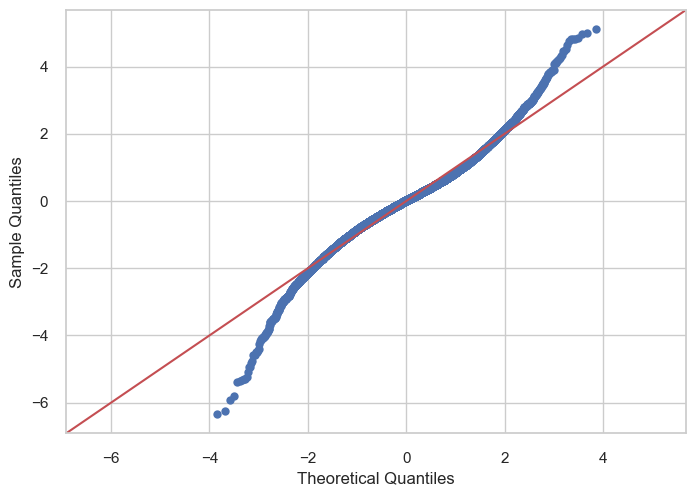

In [60]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid3 = model_3.resid
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)

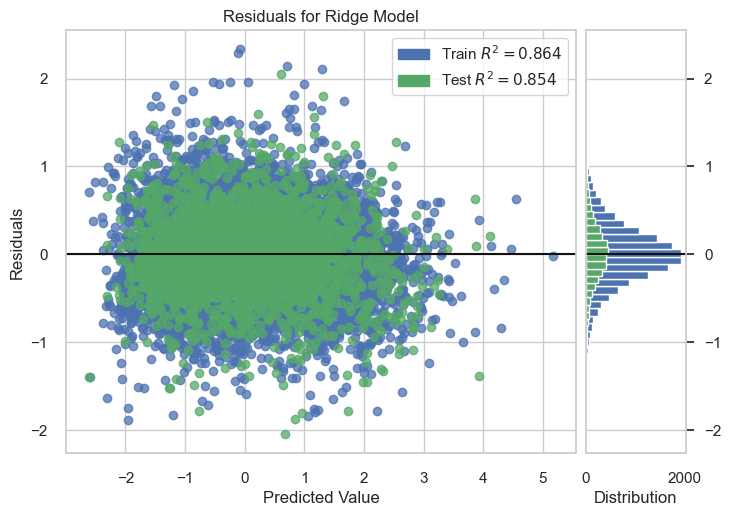

In [61]:
# Instantiate the linear model and visualizer
model_3 = Ridge()
visualizer = ResidualsPlot(model_3)
# Fit the training data
visualizer.fit(X_2_train, y_2_train) 
# Score the test data
visualizer.score(X_2_test, y_2_test)
# Plot the residuals
visualizer.show();

As expected, we don't observe any change in the residuals' behaviour.

### Iteration 4: Model 4

I'll eliminate statistically insignificant independent variables in this step.

Based on the model 3, "water_No", "zip_98092", "zip_98032", "zip_98023", "zip_98002" features' p-value didn't fall within the 95% confidence interval and failed the test - meaning, there was no effect observed. I'm removing them from my model.

In [62]:
# Creating a new dataframe with the significant variables

df_norm = df_ohe.drop ([ 'water_No', 'zip_98092', 'zip_98032', 'zip_98023', 'zip_98002'], axis=1)

df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_old',
       'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052',
       'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122',
       'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144',
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_98

In [63]:
# Normalising the new dataframe
df_norm = normalize(df_norm)

In [64]:
df_norm.head()

price  bedrooms  bathrooms  sqft_lot  floors  condition  sqft_above  \
0  -1.39     -0.31      -1.63     -0.41   -0.93      -0.63       -0.74   
1   0.29     -0.31       0.31     -0.13    1.02      -0.63        0.69   
2  -1.79     -1.68      -1.63      0.23   -0.93      -0.63       -1.75   
3   0.51      0.75       1.14     -0.54   -0.93       2.24       -1.02   
4   0.19     -0.31      -0.01     -0.01   -0.93      -0.63        0.09   

   sqft_basement  sqft_living15  sqft_lot15  ...  zip_98166  zip_98168  \
0          -0.80          -1.03       -0.41  ...      -0.11      -0.11   
1           1.09          -0.32       -0.04  ...      -0.11      -0.11   
2          -0.80           1.14        0.03  ...      -0.11      -0.11   
3           1.34          -0.99       -0.56  ...      -0.11      -0.11   
4          -0.80          -0.13       -0.06  ...      -0.11      -0.11   

   zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  water_Yes  \
0      -0.11       8.96      -0.08      -0.12      -0.12      -0.08   
1      -0.11      -0.11      -0.08      -0.12      -0.12      -0.08   
2      -0.11      -0.11      -0.08      -0.12      -0.12      -0.08   
3      -0.11      -0.11      -0.08      -0.12      -0.12      -0.08   
4      -0.11      -0.11      -0.08      -0.12      -0.12      -0.08   

   reno_recently renovated  reno_renovated  
0                    -0.09           -0.17  
1                    -0.09            5.99  
2                    -0.09           -0.17  
3                    -0.09           -0.17  
4                    -0.09           -0.17  

[5 rows x 79 columns]

In [65]:
# Splitting the data into train and test
# I'm going through this process again because I want to give less data to train split to avoid overfitting.
# X is my independent variables aka features
X_4 = df_norm.drop("price", axis=1)

# Y is my dependent variable which is "price" in this model
y_4 = df_norm["price"]

# Splitting the data by 25/75.
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size = 0.25, random_state=49)

In [66]:
regressor = LinearRegression()
regressor.fit(X_4_train, y_4_train)

LinearRegression()

In [67]:
#Fit a linear regression model and calculate MSE for test and train
linreg = LinearRegression()
linreg.fit(X_4_train, y_4_train)

y_4_hat_train = linreg.predict(X_4_train)
y_4_hat_test = linreg.predict(X_4_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_4_train, y_4_hat_train)
test_r2 = r2_score(y_4_test, y_4_hat_test)

train_mse = mean_squared_error(y_4_train, y_4_hat_train)
test_mse = mean_squared_error(y_4_test, y_4_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.8632841029845695 & Mean Absolute Error 0.137078791352445
Testing Scores: R2 0.8596179712509631 & Mean Absolute Error 0.13923708120071693


#### Comments:

- The training R2 is 0.43% higher than the testing R2.
- The training MAE is -1.55% lower than the testing MAE.
- The model seems to be a good fit.

#### Evaluation of The Model 4

In [68]:
# Running the OLS Regression
# X_4_train X_4_test y_4_train y_4_test 

X_4_train_with_intercept = sm.add_constant(X_4_train)
model_4 = sm.OLS(y_4_train,X_4_train_with_intercept).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1278.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:35:38   Log-Likelihood:                -6748.4
No. Observations:               15866   AIC:                         1.365e+04
Df Residuals:                   15787   BIC:                         1.426e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0002      0.003     -0.074      0.941      -0.006       0.006
bedrooms                   -0.0460      0.004    -11.625      0.000      -0.054      -0.038
bathrooms                   0.0616      0.005     11.551      0.000       0.051       0.072
sqft_lot                    0.1535      0.008     19.554      0.000       0.138       0.169
floors                     -0.0320      0.005     -6.552      0.000      -0.042      -0.022
condition                   0.0812      0.003     24.359      0.000       0.075       0.088
sqft_above                  0.4415      0.007     65.968      0.000       0.428       0.455
sqft_basement               0.1447      0.004     34.984      0.000       0.137       0.153
sqft_living15               0.1697      0.005     34.223      0.000       0.160       0.179
sqft_lot15                 -0.0185      0.008     -2.382      0.017      -0.034      -0.003
yr_old                     -0.0656      0.005    -13.684      0.000      -0.075      -0.056
zip_98003                   0.0091      0.003      2.810      0.005       0.003       0.015
zip_98004                   0.2709      0.003     83.400      0.000       0.265       0.277
zip_98005                   0.1278      0.003     39.096      0.000       0.121       0.134
zip_98006                   0.2102      0.003     62.347      0.000       0.204       0.217
zip_98007                   0.1068      0.003     34.591      0.000       0.101       0.113
zip_98008                   0.1553      0.003     49.175      0.000       0.149       0.162
zip_98010                   0.0273      0.003      8.964      0.000       0.021       0.033
zip_98011                   0.0796      0.003     26.169      0.000       0.074       0.086
zip_98014                   0.0393      0.003     12.882      0.000       0.033       0.045
zip_98019                   0.0495      0.003     15.961      0.000       0.043       0.056
zip_98022                   0.0114      0.003      3.665      0.000       0.005       0.018
zip_98024                   0.0481      0.003     15.939      0.000       0.042       0.054
zip_98027                   0.1330      0.003     40.166      0.000       0.126       0.139
zip_98028                   0.0940      0.003     29.833      0.000       0.088       0.100
zip_98029                   0.1484      0.003     45.629      0.000       0.142       0.155
zip_98030                   0.0089      0.003      2.865      0.004       0.003       0.015
zip_98031                   0.0163      0.003      5.217      0.000       0.010       0.022
zip_98033                   0.2207      0.003     66.724      0.000       0.214       0.227
zip_98034                   0.1754      0.003     51.078      0.000       0.169       0.182
zip_98038                   0.0428      0.003  

#### Comments:

- Our Adjusted R2 value decreased from 85.4% to 86.3% - off the back of the new train/test split. Because the drop is only 1.04%, I'll make this trade-off for a better fitting model.
- The JB score is down by 4.82%. It's not a significant improvement but it's heading to a better direction.

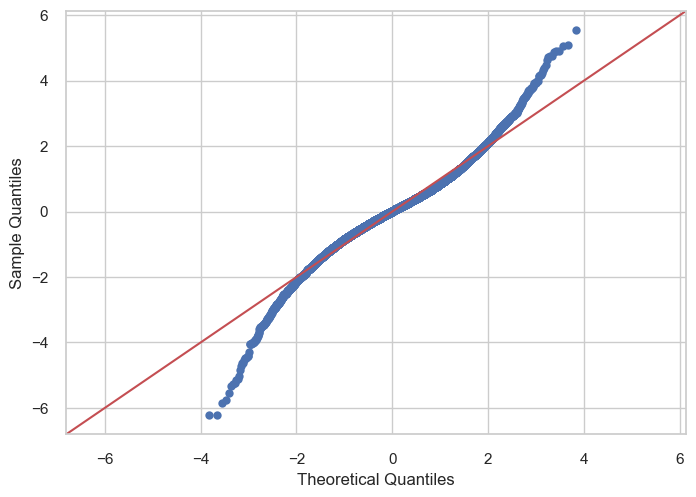

In [69]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid4 = model_4.resid
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)

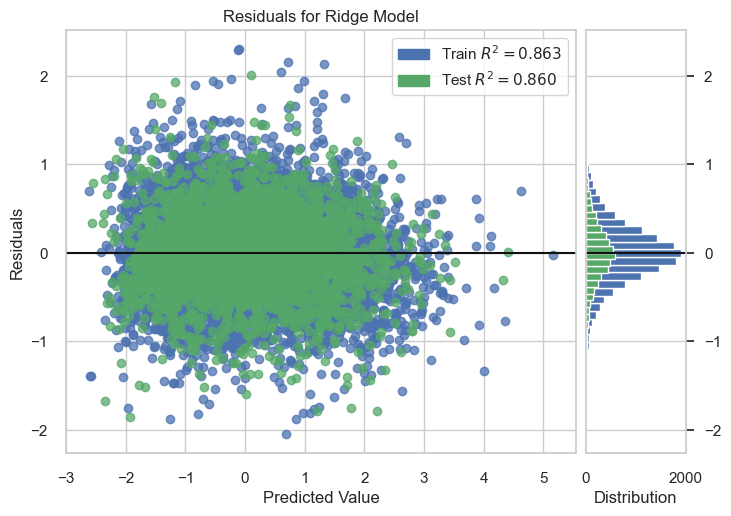

In [70]:
# Instantiate the linear model and visualizer
model_4 = Ridge()
visualizer = ResidualsPlot(model_4)
# Fit the training data
visualizer.fit(X_4_train, y_4_train) 
# Score the test data
visualizer.score(X_4_test, y_4_test)
# Plot the residuals
visualizer.show();

Q-Q plot still shows some skewness. I'll try to address it in my model 5.

### Iteration 5: Model 5

I'll address the outliers.

In [71]:
# First, let's check the shape of the model 4's train data.

X_4_train.shape

(15866, 78)

In [72]:
# Using the Local Outlier Factor (LOF) anomaly score to detect the outliers.
# It assess how isolated the value is with respect to the surrounding neighborhood.

# Instantiating LocalOutlierFactor and fit & predict on training data

lof = LocalOutlierFactor()
y_pred = lof.fit_predict(X_4_train)

# Creating a mask of inlier data
# Outliers are assigned '-1'. 
mask = y_pred != -1

# Using mask to eliminate outliers from training data
X_4_train, y_4_train = X_4_train.iloc[mask, :], y_4_train.iloc[mask]

In [73]:
#Compare number of rows to another training dataset
X_4_train.shape

(14641, 78)

319 rows are removed.

In [74]:
regressor = LinearRegression()
regressor.fit(X_4_train, y_4_train)

LinearRegression()

In [75]:
# Fitting a linear regression model and calculate MSE for test and train
linreg5 = LinearRegression()
linreg5.fit(X_4_train, y_4_train)

y_4_hat_train = linreg.predict(X_4_train)
y_4_hat_test = linreg.predict(X_4_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_4_train, y_4_hat_train)
test_r2 = r2_score(y_4_test, y_4_hat_test)

train_mse = mean_squared_error(y_4_train, y_4_hat_train)
test_mse = mean_squared_error(y_4_test, y_4_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.8662874987757456 & Mean Absolute Error 0.13016048648054976
Testing Scores: R2 0.8596179712509631 & Mean Absolute Error 0.13923708120071693


#### Comments:

- The training R2 is 0.88% higher than the testing R2.
- The training MAE is 7.10% lower than the testing MAE.
- Without the outliers, the model is slightly overfitted but still acceptable.

#### Evaluation of The Model 5

In [76]:
# Running the OLS Regression

X_5_train_with_intercept = sm.add_constant(X_4_train)
model_5 = sm.OLS(y_4_train,X_5_train_with_intercept).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1212.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:35:42   Log-Likelihood:                -5833.3
No. Observations:               14641   AIC:                         1.182e+04
Df Residuals:                   14562   BIC:                         1.242e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0003      0.003     -0.103      0.918      -0.007       0.006
bedrooms                   -0.0429      0.004    -10.205      0.000      -0.051      -0.035
bathrooms                   0.0533      0.006      9.631      0.000       0.042       0.064
sqft_lot                    0.1616      0.009     17.973      0.000       0.144       0.179
floors                     -0.0258      0.005     -5.032      0.000      -0.036      -0.016
condition                   0.0803      0.004     22.729      0.000       0.073       0.087
sqft_above                  0.4371      0.007     62.782      0.000       0.423       0.451
sqft_basement               0.1442      0.004     33.662      0.000       0.136       0.153
sqft_living15               0.1751      0.005     33.514      0.000       0.165       0.185
sqft_lot15                 -0.0313      0.009     -3.562      0.000      -0.048      -0.014
yr_old                     -0.0607      0.005    -11.970      0.000      -0.071      -0.051
zip_98003                   0.0087      0.003      2.661      0.008       0.002       0.015
zip_98004                   0.2707      0.003     81.032      0.000       0.264       0.277
zip_98005                   0.1291      0.003     39.146      0.000       0.123       0.136
zip_98006                   0.2097      0.003     61.127      0.000       0.203       0.216
zip_98007                   0.1070      0.003     34.593      0.000       0.101       0.113
zip_98008                   0.1550      0.003     48.760      0.000       0.149       0.161
zip_98010                   0.0274      0.003      8.716      0.000       0.021       0.034
zip_98011                   0.0812      0.003     26.468      0.000       0.075       0.087
zip_98014                   0.0420      0.003     13.735      0.000       0.036       0.048
zip_98019                   0.0497      0.003     15.470      0.000       0.043       0.056
zip_98022                   0.0114      0.003      3.580      0.000       0.005       0.018
zip_98024                   0.0488      0.003     16.113      0.000       0.043       0.055
zip_98027                   0.1345      0.003     40.674      0.000       0.128       0.141
zip_98028                   0.0939      0.003     29.213      0.000       0.088       0.100
zip_98029                   0.1497      0.003     43.879      0.000       0.143       0.156
zip_98030                   0.0091      0.003      2.912      0.004       0.003       0.015
zip_98031                   0.0164      0.003      5.176      0.000       0.010       0.023
zip_98033                   0.2194      0.003     66.044      0.000       0.213       0.226
zip_98034                   0.1758      0.003     50.465      0.000       0.169       0.183
zip_98038                   0.0451      0.004  

#### Comments:

- The adjusted R2 is improved from 86.3% to 86.6%. It'a slight 0.35% improvement.
- The JB score is down by 7.70% but still at large - indicating there's still skewness in the data.

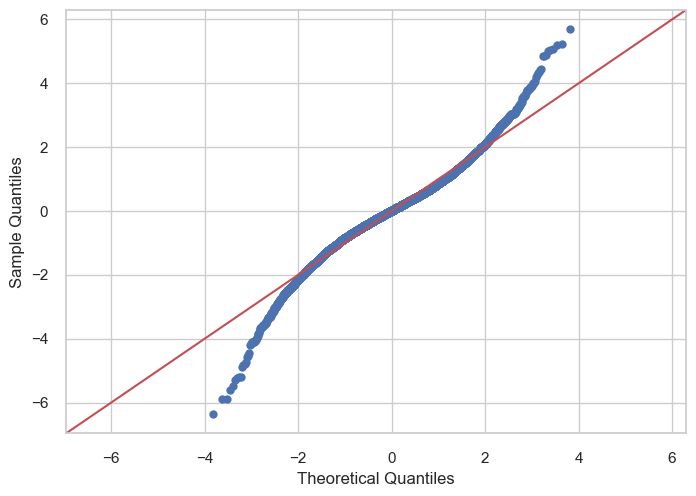

In [77]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid5 = model_5.resid
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)

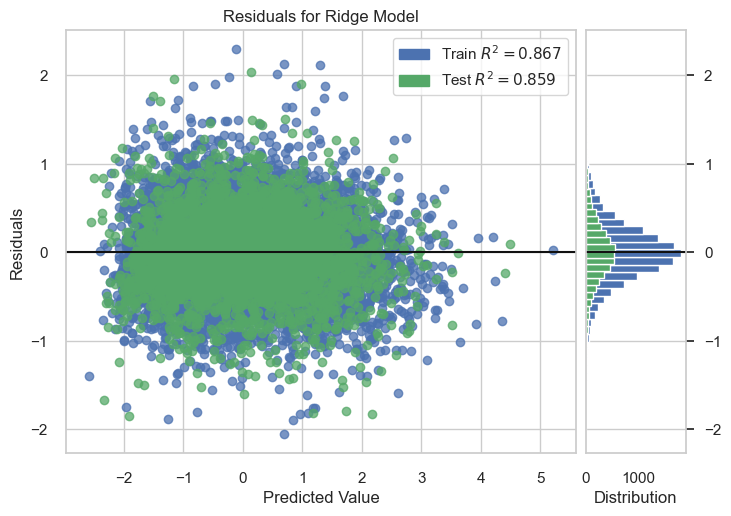

In [78]:
# Instantiate the linear model and visualizer
model_5 = Ridge()
visualizer = ResidualsPlot(model_5)
# Fit the training data
visualizer.fit(X_4_train, y_4_train) 
# Score the test data
visualizer.score(X_4_test, y_4_test)
# Plot the residuals
visualizer.show();

## Analysing The Final Model (Model 5)

In [79]:
# Let's look at the coefficients of the features to see how each feature affects the final house price.
# Creating a dictionary of features and their coefficients

coef_dict = dict(zip(X_4.columns, linreg5.coef_))
sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

[('sqft_above', 0.4370823290049757),
 ('zip_98103', 0.29913713763875066),
 ('zip_98115', 0.28578084506927715),
 ('zip_98117', 0.28304630722285706),
 ('zip_98004', 0.2707332848793552),
 ('zip_98112', 0.25122900495146017),
 ('zip_98199', 0.22888316185876573),
 ('zip_98033', 0.21941871447231392),
 ('zip_98116', 0.21092029356394792),
 ('zip_98006', 0.20966708934560557),
 ('zip_98122', 0.20689070882337957),
 ('zip_98040', 0.20582810797062698),
 ('zip_98105', 0.2045677366370663),
 ('zip_98107', 0.20287147672852296),
 ('zip_98052', 0.20128788471923692),
 ('zip_98119', 0.1983973677261281),
 ('zip_98144', 0.18706488752464934),
 ('zip_98034', 0.1758142449950017),
 ('sqft_living15', 0.1750795967834689),
 ('zip_98136', 0.17052385317332772),
 ('zip_98126', 0.16807693167899634),
 ('zip_98125', 0.16770669523269244),
 ('sqft_lot', 0.16155407151274936),
 ('zip_98074', 0.16029228803400505),
 ('zip_98118', 0.15708568243479154),
 ('zip_98008', 0.15500180159200833),
 ('zip_98133', 0.15291505826934174),
 ('

### Zipcode Dictionary

Because we can't change the zipcode with renovations, I will seperate their coefficients from the rest of the features.

In [81]:
# Create the dictionary for zipcodes & transformed coefficients
zip_dict = {}
# Also create a dictionary for the other features minus the zipcodes.
feature_dict = {}

for key, value in coef_dict.items():
    if 'zip_' in key: 
        zip_dict[key] = value
    else:
        feature_dict[key] = value

In [82]:
sorted(zip_dict.items(), key=lambda x: x[1], reverse=True)

[('zip_98103', 0.29913713763875066),
 ('zip_98115', 0.28578084506927715),
 ('zip_98117', 0.28304630722285706),
 ('zip_98004', 0.2707332848793552),
 ('zip_98112', 0.25122900495146017),
 ('zip_98199', 0.22888316185876573),
 ('zip_98033', 0.21941871447231392),
 ('zip_98116', 0.21092029356394792),
 ('zip_98006', 0.20966708934560557),
 ('zip_98122', 0.20689070882337957),
 ('zip_98040', 0.20582810797062698),
 ('zip_98105', 0.2045677366370663),
 ('zip_98107', 0.20287147672852296),
 ('zip_98052', 0.20128788471923692),
 ('zip_98119', 0.1983973677261281),
 ('zip_98144', 0.18706488752464934),
 ('zip_98034', 0.1758142449950017),
 ('zip_98136', 0.17052385317332772),
 ('zip_98126', 0.16807693167899634),
 ('zip_98125', 0.16770669523269244),
 ('zip_98074', 0.16029228803400505),
 ('zip_98118', 0.15708568243479154),
 ('zip_98008', 0.15500180159200833),
 ('zip_98133', 0.15291505826934174),
 ('zip_98109', 0.14998215025218742),
 ('zip_98029', 0.14967890698545638),
 ('zip_98053', 0.14871507159795563),
 ('zi

This dictonary can be useful for the future studies.

In [83]:
sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)

[('sqft_above', 0.4370823290049757),
 ('sqft_living15', 0.1750795967834689),
 ('sqft_lot', 0.16155407151274936),
 ('sqft_basement', 0.14416752707796596),
 ('water_Yes', 0.12026669259457917),
 ('condition', 0.08027139319583562),
 ('bathrooms', 0.05330324961425137),
 ('reno_recently renovated', 0.03203198030165008),
 ('reno_renovated', 0.02133387776980724),
 ('floors', -0.025755400843614606),
 ('sqft_lot15', -0.03127629266624002),
 ('bedrooms', -0.042916796692345285),
 ('yr_old', -0.060735090642687645)]

In [85]:
df_features = pd.DataFrame.from_dict(feature_dict, orient ='index')
df_features.sort_values(by=0, ascending=False)

0
sqft_above               0.44
sqft_living15            0.18
sqft_lot                 0.16
sqft_basement            0.14
water_Yes                0.12
condition                0.08
bathrooms                0.05
reno_recently renovated  0.03
reno_renovated           0.02
floors                  -0.03
sqft_lot15              -0.03
bedrooms                -0.04
yr_old                  -0.06

## Conclusions

- The model is created through 5 iterations. It explains 86.6% of the variables in the dependent variable (Y = Sale Prices) through independent variables (X = Features / Predictors).
- Through iterations, I increased the adjusted R2 value from 78.8% to 86.6% which is a significant 10% increase, resolved the large condition number issue, and recuded the Jarqe-Bera score from 998472 to 3451.401 (-99.65%).
- Apart from the locations of the houses, which cannot change through renovations,  "square footage of house apart from basement", "the square footage of interior housing living space for the nearest 15 neighbors" and "the square footage of the lot" appeared to be the most important features when it comes to valuing a property.

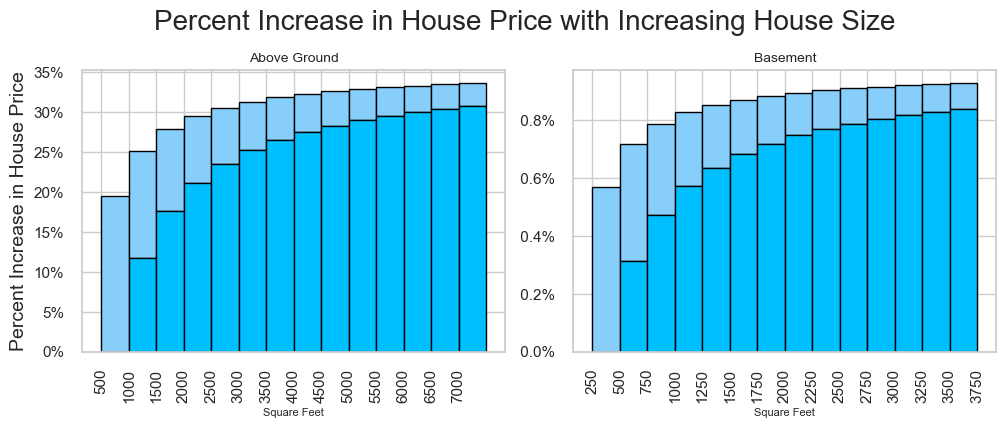

In [95]:
# Plot how an increase in square feet affects house price.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# List to contain incremental percent increase in price
# for increase sqft above ground
incremental_increase_abv = []
for num in range(1000, 8000, 500):
    # Calculate percent increase in adding 500 sqft
    pct_increase = (500 / num) + 1
    # Use the coef to calculate the corresponding increase in price
    transform = (pct_increase**0.44 - 1)*100
    incremental_increase_abv.append(transform)
    
# List to contain total percent increase in price
total_increase_abv = []
for num in range(1000, 8000, 500):
    # Calculate total percent increase from 500 sqft
    pct_increase = ((num - 500) / num) + 1
    # Use the coef to calculate the corresponding increase in price
    transform = (pct_increase**0.44 - 1)*100
    total_increase_abv.append(transform)
    
# Find the difference in total and incremental increases for the 
# stacked bar graph
tot_inc_abv = np.array(total_increase_abv)
inc_inc_abv = np.array(incremental_increase_abv)
diff_abv = tot_inc_abv - inc_inc_abv

# List to contain incremental percent increase in price
# for increase sqft basement

incremental_increase_bsmt = []    
for num in range(500, 4000, 250):
    # Calculate percent increase in adding 500 sqft
    pct_increase = (250 / num) + 1
    # Use the coef to calculate the corresponding increase in price
    transform = (pct_increase**0.014 - 1)*100
    incremental_increase_bsmt.append(transform)
    
# List to contain total percent increase in price
# for increase sqft basement
total_increase_bsmt = []    
for num in range(500, 4000, 250):
    # Calculate total percent increase from 500 sqft
    pct_increase = ((num - 250) / num) + 1
    # Use the coef to calculate the corresponding increase in price
    transform = (pct_increase**0.014 - 1)*100
    total_increase_bsmt.append(transform)
    
# Find the difference in total and incremental increases for the 
# stacked bar graph
tot_inc_bsmt = np.array(total_increase_bsmt)
inc_inc_bsmt = np.array(incremental_increase_bsmt)
diff_bsmt = tot_inc_bsmt - inc_inc_bsmt

fig.suptitle('Percent Increase in House Price with Increasing House Size', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.83)

ax1.set_title('Above Ground', fontsize=10)
ax1.set_xlabel('Square Feet', fontsize=8)
ax1.set_ylabel('Percent Increase in House Price', fontsize=14)
ax1.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}%'))
ax1.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))
ax1.set_xticks([x-500 for x in range(1000, 8000, 500)])
ax1.set_xticklabels([x-500 for x in range(1000, 8000, 500)],rotation=90)
ax1.tick_params(axis='x', which='both', length=5)

ax1.bar(range(1000, 8000, 500), incremental_increase_abv, align='edge', width= -500, edgecolor='black', 
        color='lightskyblue', bottom=diff_abv)
ax1.bar(range(1000, 8000, 500), diff_abv, align='edge', width= -500, color='deepskyblue', edgecolor='black')

ax2.set_title('Basement', fontsize=10)
ax2.set_xlabel('Square Feet', fontsize=8)
ax2.set_ylabel
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x: .1f}%'))
ax2.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))
#ax2.bar(range(500, 4000, 500), increase_bsmt, align='edge', width=500, edgecolor='black')
ax2.set_xticks([x-250 for x in range(500, 4500, 250)])
ax2.set_xticklabels([x-250 for x in range(500, 4500, 250)],rotation=90)
ax2.tick_params(axis='x', which='both', length=5)

ax2.bar(range(500, 4000, 250), incremental_increase_bsmt, align='edge', width= -250, edgecolor='black', 
        color='lightskyblue', bottom=diff_bsmt)
ax2.bar(range(500, 4000, 250), diff_bsmt, align='edge', width= -250, color='deepskyblue', edgecolor='black')

plt.show()

## Limitations & Next Steps

Even though I created a good fit model that explains 86.6% of the variables, it is just an initial study to identify the top features - and it comes with its own limitations. The main issue with the study is the variables it uses. 

I included most of the variables as is. However, the model showed some interesting outcomes that requires more investigation. Next steps to refine the model should include the following points:

- The square footage of interior housing living space for the nearest 15 neighbors is the second most important feature in the model. By itself, it doesn't give much insight on the renovations. If we transform this data into a categorical variable that states whether a house has a larger living space than its neighbours will be more meaningful.
- The number of floors and the number of bedrooms have negative correlation with house prices. It's an unexpected result from a business perspective. Their relationship with the square footage of living space and the sizes of the rooms and floors could give more actionable insights. It's possible that having larger rooms and floors could be increasing the value of the property more than the number of them.
- Finally, Jarqe-Bera score of the study is still at large and needs addressing. Transforming the features by considering the above points could help - or the model could be more aggressive with removing the outliers.

In [3]:
df_news = pd.read_csv('data/OnlineNewsPopularity.csv')

In [4]:
df_news.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.00   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.00   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.00   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.00   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.00   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0            12.00             219.00              0.66               1.00   
1             9.00             255.00              0.60               1.00   
2             9.00             211.00              0.58               1.00   
3             9.00             531.00              0.50               1.00   
4            13.00            1072.00              0.42               1.00   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                       0.82        4.00             2.00       1.00  ...   
1                       0.79        3.00             1.00       1.00  ...   
2                       0.66        3.00             1.00       1.00  ...   
3                       0.67        9.00             0.00       1.00  ...   
4                       0.54       19.00            19.00      20.00  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                    0.10                    0.70                   -0.35   
1                    0.03                    0.70                   -0.12   
2                    0.10                    1.00                   -0.47   
3                    0.14                    0.80                   -0.37   
4                    0.03                    1.00                   -0.22   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                   -0.60                   -0.20                 0.50   
1                   -0.12                   -0.10                 0.00   
2                   -0.80                   -0.13                 0.00   
3                   -0.60                   -0.17                 0.00   
4                   -0.50                   -0.05                 0.45   

    title_sentiment_polarity   abs_title_subjectivity  \
0                      -0.19                     0.00   
1                       0.00                     0.50   
2                       0.00                     0.50   
3                       0.00                     0.50   
4                       0.14                     0.05   

    abs_title_sentiment_polarity   shares  
0                           0.19      593  
1                           0.00      711  
2                           0.00     1500  
3                           0.00     1200  
4                           0.14      505  

[5 rows x 61 columns]

In [6]:
df_news.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count    39644.00         39644.00           39644.00          39644.00   
mean       354.53            10.40             546.51              0.55   
std        214.16             2.11             471.11              3.52   
min          8.00             2.00               0.00              0.00   
25%        164.00             9.00             246.00              0.47   
50%        339.00            10.00             409.00              0.54   
75%        542.00            12.00             716.00              0.61   
max        731.00            23.00            8474.00            701.00   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
count           39644.00                   39644.00    39644.00   
mean                1.00                       0.69       10.88   
std                 5.23                       3.26       11.33   
min                 0.00                       0.00        0.00   
25%                 1.00                       0.63        4.00   
50%                 1.00                       0.69        8.00   
75%                 1.00                       0.75       14.00   
max              1042.00                     650.00      304.00   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
count         39644.00   39644.00     39644.00  ...                39644.00   
mean              3.29       4.54         1.25  ...                    0.10   
std               3.86       8.31         4.11  ...                    0.07   
min               0.00       0.00         0.00  ...                    0.00   
25%               1.00       1.00         0.00  ...                    0.05   
50%               3.00       1.00         0.00  ...                    0.10   
75%               4.00       4.00         1.00  ...                    0.10   
max             116.00     128.00        91.00  ...                    1.00   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
count                39644.00                39644.00                39644.00   
mean                     0.76                   -0.26                   -0.52   
std                      0.25                    0.13                    0.29   
min                      0.00                   -1.00                   -1.00   
25%                      0.60                   -0.33                   -0.70   
50%                      0.80                   -0.25                   -0.50   
75%                      1.00                   -0.19                   -0.30   
max                      1.00                    0.00                    0.00   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
count                39644.00             39644.00                   39644.00   
mean                    -0.11                 0.28                       0.07   
std                      0.10                 0.32                       0.27   
min                     -1.00                 0.00                      -1.00   
25%                     -0.12                 0.00                       0.00   
50%                     -0.10                 0.15                       0.00   
75%                     -0.05                 0.50                       0.15   
max                      0.00                 1.00                       1.00   

        abs_title_subjectivity   abs_title_sentiment_polarity    shares  
count                 39644.00                       39644.00  39644.00  
mean                      0.34                           0.16   3395.38  
std                       0.19                           0.23  11626.95  
min                       0.00                           0.00      1.00  
25%                       0.17                           0.00    946.00  
50%                       0.50                           0.00   1400.00  
75%                       0.50        

In [7]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [8]:
df_news.shape

(39644, 61)